# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [6]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan untuk mengatur gaya visualisasi seaborn
sns.set(style="whitegrid")

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [7]:
#Type your code here

clustered_data = pd.read_csv("clustered_data.csv")

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [12]:
# Definisikan X dan y
X = clustered_data.drop(columns=['Cluster'])  # Ganti 'Cluster' dengan nama kolom target Anda
y = clustered_data['Cluster']  # Ganti 'Cluster' dengan nama kolom target Anda

# Splitting dataset into training and testing set 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Verifikasi ukuran set pelatihan dan pengujian
print(f"Ukuran X_train: {X_train.shape}")
print(f"Ukuran X_test: {X_test.shape}")
print(f"Ukuran y_train: {y_train.shape}")
print(f"Ukuran y_test: {y_test.shape}")

Ukuran X_train: (1995, 19)
Ukuran X_test: (499, 19)
Ukuran y_train: (1995,)
Ukuran y_test: (499,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

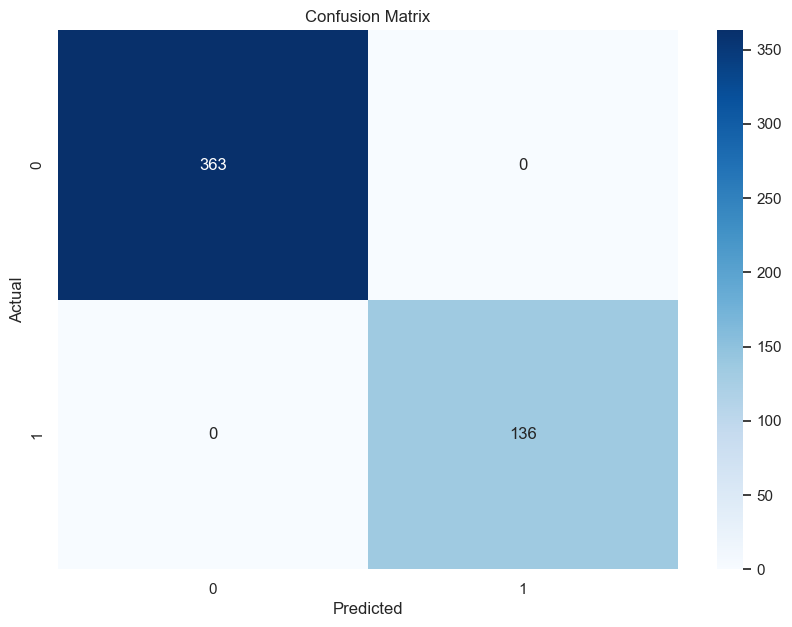

In [ ]:
#Type your code here

# Membangun Model Klasifikasi

# Preprocessing: Menghapus kolom dengan tipe data non-numerik
X_train_numeric = X_train.select_dtypes(include=['float64', 'int64', 'bool'])
X_test_numeric = X_test.select_dtypes(include=['float64', 'int64', 'bool'])

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model dengan data training
rf_model.fit(X_train_numeric, y_train)

# Lakukan prediksi menggunakan data uji
y_pred = rf_model.predict(X_test_numeric)


# Buat confusion matrix untuk melihat detail prediksi benar dan salah
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [17]:
#Type your code here

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_rep)


Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       363
           1       1.00      1.00      1.00       136

    accuracy                           1.00       499
   macro avg       1.00      1.00      1.00       499
weighted avg       1.00      1.00      1.00       499



Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

## Analisis Hasil Evaluasi Model Klasifikasi

Berdasarkan confusion matrix yang dihasilkan, berikut adalah analisis hasil evaluasi model klasifikasi menggunakan Random Forest:

### Confusion Matrix:
- **True Positives (TP)**: 136 (Cluster 1 diprediksi dengan benar sebagai Cluster 1)
- **True Negatives (TN)**: 363 (Cluster 0 diprediksi dengan benar sebagai Cluster 0)
- **False Positives (FP)**: 0 (Cluster 0 diprediksi salah sebagai Cluster 1)
- **False Negatives (FN)**: 0 (Cluster 1 diprediksi salah sebagai Cluster 0)

### Metrik Evaluasi:
- **Akurasi**: 1.0 (100%)
  - Akurasi adalah proporsi hasil yang benar (baik true positives maupun true negatives) dari total kasus yang diperiksa.
- **Presisi**: 1.0 (100%)
  - Presisi adalah proporsi hasil positif yang benar dalam hasil positif yang diprediksi.
- **Recall**: 1.0 (100%)
  - Recall adalah proporsi hasil positif yang benar dalam hasil positif yang sebenarnya.
- **F1-Score**: 1.0 (100%)
  - F1-Score adalah rata-rata harmonis dari presisi dan recall.

### Interpretasi Hasil:
1. **Kinerja Model**:
   - Model telah mencapai akurasi, presisi, recall, dan F1-score yang sempurna. Ini menunjukkan bahwa model telah mengklasifikasikan semua instance dalam set uji dengan benar tanpa kesalahan.

2. **Analisis Confusion Matrix**:
   - Confusion matrix menunjukkan bahwa tidak ada false positives atau false negatives, yang berarti model tidak membuat prediksi yang salah.
   - Semua instance dari Cluster 0 dan Cluster 1 telah diklasifikasikan dengan benar.

3. **Implikasi Bisnis**:
   - **Cluster 0**: Cluster ini mewakili kelompok pelanggan dengan karakteristik tertentu. Kemampuan model untuk mengklasifikasikan pelanggan ini dengan akurat dapat membantu dalam menargetkan mereka dengan strategi pemasaran khusus atau penawaran yang dipersonalisasi.
   - **Cluster 1**: Cluster ini mewakili kelompok pelanggan lain dengan karakteristik yang berbeda dari pola lainnya tetapi memiliki pola yang suspicious sehingga perlu diperdalami lagi secara tracking history transaksi
## Rekomendasi (Feature Engineering):
**Pentingnya Fitur**:
   - Analisis skor pentingnya fitur dari model Random Forest untuk memahami fitur mana yang paling berkontribusi terhadap klasifikasi. Ini dapat membantu dalam memperbaiki set fitur dan meningkatkan model lebih lanjut.
   - Contoh kode untuk mendapatkan pentingnya fitur:
     ```python
     feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                        index=X_train.columns,
                                        columns=['importance']).sort_values('importance', ascending=False)
     print(feature_importances)
     ```
